In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as web
from sklearn.linear_model import LinearRegression
import datetime as dt

In [36]:
def sACF(y,K):
    T = len(y)
    ytb = y.mean()
    ACF = np.zeros(K)
    c0 = np.sum((y-ytb)**2)/T
    for k in range(1, K+1):
        ck = np.sum((y-ytb)[:T-k]*(y-ytb)[k:T])/T
        ACF[k-1]= ck/c0
    
    se_ACF = np.zeros(K)
    for i in range(K):
        se_ACF[i] = np.sqrt(1/T*(1+2*np.sum(ACF[:i]**2)))
    return ACF, se_ACF

def sPACF(y,K):
    T = len(y)
    ACF = sACF(y,K)[0]
    PACF = np.zeros(K)
    for m in range(1,K+1):
        P = np.eye(m)
        for i in range(m):
            for j in range(i):
                P[i,j] = ACF[i-j-1]
            for j in range(i+1,m):
                P[i,j] = ACF[j-i-1];
        PACF[m-1] = np.linalg.solve(P,ACF[:m])[-1]
    se_PACF = np.array([1/np.sqrt(T) for i in range(K)])
    return PACF, se_PACF

def Qstat(at,k):
    at_ACF = sACF(at,k)[0]
    n = len(at)
    Qstat = 0
    for i in range(k):
        Qstat += n*(n+2)*at_ACF[i]**2/(n-i-1)
    return Qstat

In [37]:
data = pd.read_excel('US Vehicle Traffic Fatalities.xlsx')
data

,Year,Fatalities,Resident,Drivers,Vehicles,Miles,Unemployment
0,1966,50894,196560,100998,95703,926,3.8
1,1967,50724,198712,103172,98859,964,3.8
2,1968,52725,200706,105410,102987,1016,3.6
3,1969,53543,202677,108306,107412,1062,3.5
4,1970,52627,205052,111543,111242,1110,4.9
5,1971,52542,207661,114426,116330,1179,5.9
6,1972,54589,209896,118414,122557,1260,5.6
7,1973,54052,211909,121546,130025,1313,4.9
8,1974,45196,213854,125427,134900,1281,5.6
9,1975,44525,215973,129791,126153,1328,8.5


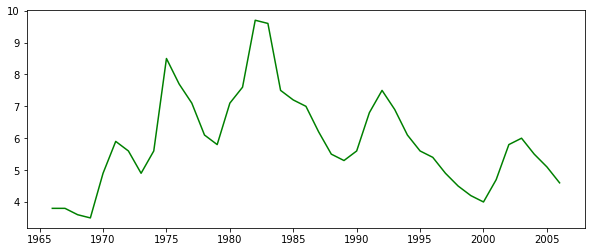

In [38]:
a = data['Year'].values
b= data['Unemployment'].values
x = a[:41]
y = b[:41]
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(x, y, color='green')
plt.show()

In [39]:
n = len(y)
ytb = y.mean()
s_y = y.std()
print("Ytb=", ytb)
print("Độ lệch chuẩn=" , s_y)

Ytb= 5.919512195121952
Độ lệch chuẩn= 1.484097740551415


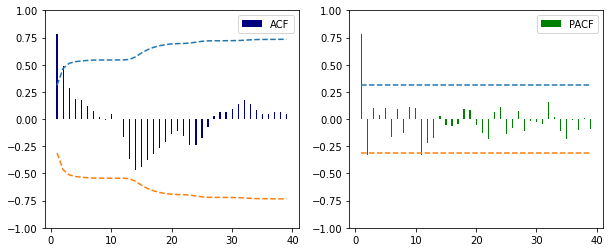

In [40]:
# TÍnh và vẽ biểu đồ tương quan ACF và PACF
K = 39
ACF, se_ACF = sACF(y,K)
PACF, se_PACF = sPACF(y,K)

fig, ax = plt.subplots(1,2,figsize = (10,4))
x = np.arange(1, K+1)
ax[0].bar(x,ACF, color='navy', width= 0.2 , label="ACF")
ax[0].plot(x, 2*se_ACF, linestyle='dashed')
ax[0].plot(x,-2*se_ACF, linestyle='dashed')
ax[0].set_ylim([-1,1])
ax[0].legend()

ax[1].bar(x,PACF, color='green', width= 0.2 , label="PACF")
ax[1].plot(x, 2*se_PACF, linestyle='dashed')
ax[1].plot(x,-2*se_PACF, linestyle='dashed')
ax[1].set_ylim([-1,1])
ax[1].legend()

plt.show()

Nhận xét: ACF sau độ trễ k=1 có giá trị xấp xỉ bằng 0
=> Mô hình phù hợp là AR(1) hoặc MA(1)
* Mô hình AR(1): 
$$y_t = \theta_0 + \phi y_{t-1} + a_t$$
=>
$$E(\phi_0)+\phi_1 E(y_{t-1}+E(a_t)$$
$$\mu = \dfrac{\theta_0}{1-\phi}$$

In [42]:
# Ước lượng tham số mô hình AR(1)
model = LinearRegression(fit_intercept = False)
ydata = y[1:]
n = len(ydata)
X = np.vstack([np.ones(n), y[:-1]]).T
model.fit(X,ydata)
theta, phi = model.coef_
print("Theta: ", theta)
print("Phi:", phi)
print(f"Mô hình có dạng: y(t) = {theta} + {phi} y(t-1)+a(t)")

at = ydata - model.predict(X)
sigma = np.sqrt(np.sum(at**2)/(len(at)-1))
se_param = sigma*np.sqrt(np.diag(np.linalg.inv(X.T@X)))
print('sigma = ', sigma)
                

Theta:  1.2204556045402293
Phi: 0.7983274918874042
Mô hình có dạng: y(t) = 1.2204556045402293 + 0.7983274918874042 y(t-1)+a(t)
sigma =  0.866524777120328


In [43]:
# Xác định giá trị dự báo
h = 5 # thời hạn dự báo
y_forecast = np.zeros(h)
y_forecast[0] = theta + phi*y[-1]

for i in range(1,h):
    y_forecast[i]= theta + phi*y_forecast[i-1]

In [44]:
# Tìm trọng số psi trong biểu diễn MA(infinity)
psi = np.zeros(h)
psi[0] = 1
for i in range(1,h):
    psi[i] = phi**i
# Độ lệch tiêu chuẩn của sai số dự báo
sigma_h = sigma*np.array([np.sqrt(np.sum(psi[:j]**2)) for j in range(1,h+1)])
z = 1.96 # Phân vị chuẩn ở mức xác suất alpha = 5%
UCL = y_forecast + z*sigma_h #Upper confidence limit
LCL = y_forecast - z*sigma_h #Lower confidence limit   

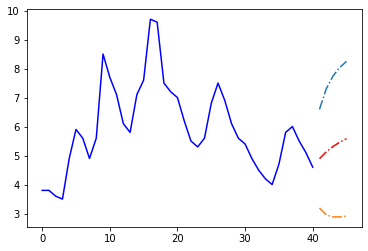

In [35]:
 #  Ve do thi
T = len(y)
x_past = np.arange(T)
x_future = np.arange(h) + T
x = np.concatenate([x_past, x_future])
plt.plot(x_past, y, color='blue')
plt.plot(x_future, y_forecast, color='red', linestyle='dashdot')
plt.plot(x_future, UCL, linestyle='dashdot')
plt.plot(x_future, LCL, linestyle='dashdot')

plt.show()